In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from dataloader import MRIDataset
from residual3dunet.model import ResidualUNet3D, UNet3D
import matplotlib.pyplot as plt
# from utils import get_loaders
import torchvision.transforms.functional as F
import torchvision.transforms as T
import random
import h5py
import numpy as np
from ipywidgets import interact
from utils.elastic_transform import RandomElastic
import nibabel as nib
from utils.utils import read_data_from_h5

import matplotlib.pyplot as plt

In [5]:
transformation = T.Compose([T.ToTensor(),
                    # T.Resize((240,240))
                    T.RandomHorizontalFlip(),
                    T.RandomRotation(90),
                    T.RandomCrop((240,240), padding=50, pad_if_needed=True)
                    ])
 
dataset = MRIDataset(train=False, transform=transformation, elastic=False)
train_loader = DataLoader(dataset=dataset, batch_size=50)

for data,mask in train_loader:
    print(data.shape)

print(torch.std_mean(data))

print(torch.amax(data))
print(torch.amin(data))


print(torch.amax(mask))
print(torch.amin(mask))

# dataset = MRIDataset(train=True)
# # train, val = torch.utils.data.random_split(dataset, [40, 10])

# dataloader = DataLoader(dataset = dataset, batch_size= 5, shuffle= True, num_workers=2)

torch.Size([50, 1, 14, 240, 240])
(tensor(0.9866, dtype=torch.float64), tensor(-0.2158, dtype=torch.float64))
tensor(9.2030, dtype=torch.float64)
tensor(-1.0983, dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0., dtype=torch.float64)


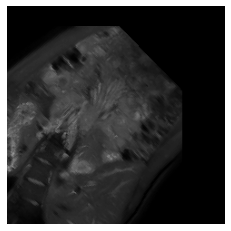

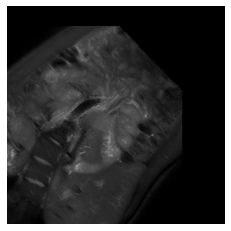

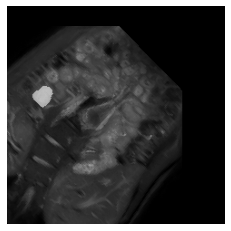

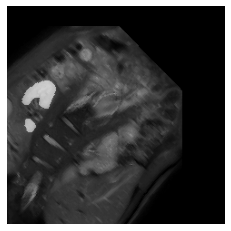

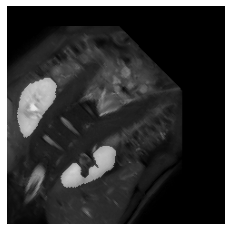

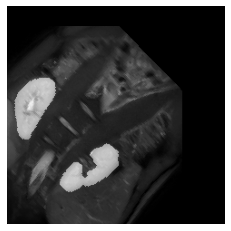

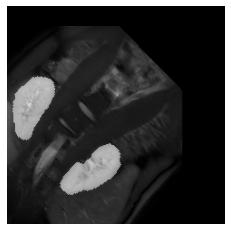

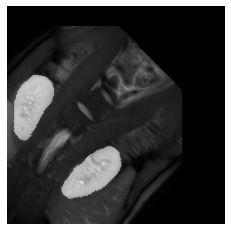

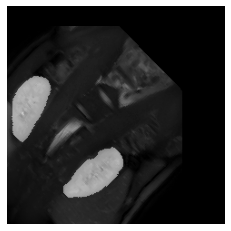

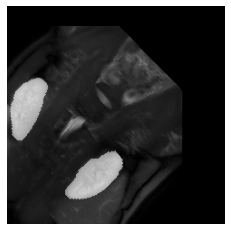

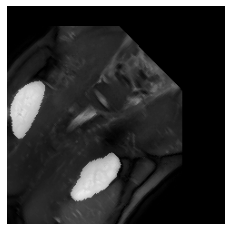

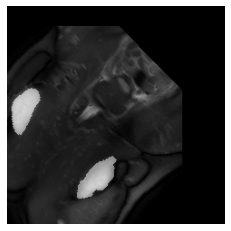

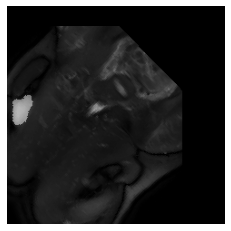

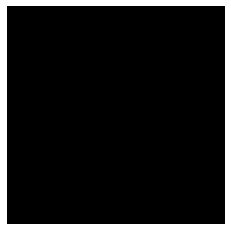

In [6]:
for i in range(14):
    fig = plt.figure()
    plt.imshow(data[0,0,i,:,:], cmap='gray')
    plt.imshow(mask[0,0,i,:,:], cmap='gray', alpha=0.4)
    plt.axis('off')
    plt.show()

In [ ]:
# dataset = MRIDataset(train=True, transform=True)

train_kwargs = {'batch_size': 10}
cuda_kwargs = {'num_workers': 1, 'pin_memory': True,'shuffle': True}
train_kwargs.update(cuda_kwargs)

#train, val = random_split(dataset, [40, 10])
# dataloader = DataLoader(dataset = val, **train_kwargs)

In [ ]:
dataloader, valloader = get_loaders(train=True, transform=True, **train_kwargs)

In [ ]:
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features.shape)
print(labels.shape)

In [ ]:
x = torch.rand((2,1,14,240,240))
len(x)

In [ ]:
model1 = ResidualUNet3D(in_channels=1, out_channels=1, f_maps=64, num_levels=4)
model2 = UNet3D(in_channels=1, out_channels=1, f_maps=64, num_levels=4)
# print(features.shape)

In [ ]:
output = model2(x)

In [ ]:
dataset2 = MRIDataset(train=True, transform=T.Compose([
    T.ToTensor(), 
    T.RandomHorizontalFlip(), 
    T.RandomCrop((240,240), padding=50, pad_if_needed=True),
    ]), elastic=True)


In [ ]:

test_loader = DataLoader(dataset = dataset2, batch_size=50, shuffle=False)

# dataiter = iter(test_loader)

# first = next(dataiter)
# second = next(dataiter)

# features1, labels1 = first
# features2, labels2 = second

for data, target in test_loader:
    print(data.shape)
    print(target.shape)



In [ ]:
# h5ftrain = h5py.File('dataset/T2train.h5','r')
# h5ftrainmask = h5py.File('dataset/T2trainmask.h5','r')

# data = h5ftrain[f'T2data_2'][:]
# target = h5ftrainmask[f'T2maskdata_2'][:]

# print(data.shape)
# print(target.shape)

# image_path = './dataset/train/T1/MRI2_T1.nii.gz'
# image_obj = nib.load(image_path)
# # print(f'Type of the image {type(image_obj)}')

# # Extract data as numpy array
# image_data = image_obj.get_fdata()
# print(type(image_data))
# print(image_data.shape)



# image_data = np.pad(image_data, ((0,0),(0,0),(0,1)))
# image_data = np.moveaxis(image_data, 2, 0)
# image_data = np.moveaxis(image_data, 2, 1)
# image_data = torch.from_numpy(image_data)
# image_data = torch.unsqueeze(image_data, 0)
# print(image_data.shape)

# preprocess = RandomElastic(alpha=0, sigma=0.06)
# data1, target1 = preprocess(data, target)

# print(data1.shape)
# print(target1.shape)


In [ ]:
# index = random.randint(0,49)
def explore_3d_image(layer):

    plt.figure(figsize=(5,10))
    # plt.imshow(data[0,layer,:,:],cmap='gray')
    
    plt.imshow(t1data[layer,:,:],cmap='gray')
    plt.imshow(t2mask[layer,:,:],cmap='gray', alpha=0.3)
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,13))